That is a fantastic goal! To perform a comprehensive analysis, we need data that reflects the key procedures of static calibration: multiple points across the range, sequential upscale/downscale readings, and repeat readings at specific points,,.

Since the provided sources describe the necessary data elements and calibration procedures (such as using a micrometer to apply known displacement to an LVDT, and the requirements for a sequential test), but do not contain a single complete dataset with all required error components (linearity, hysteresis, repeatability) simultaneously, I will use a synthesized dataset based on these principles to demonstrate the required error calculations.

Before we dive into the code, how familiar are you with writing Python scripts for data analysis and using libraries like NumPy and SciPy/Pandas? Knowing this helps me tailor the complexity of the example.

Assuming you are ready to proceed with the analysis, here is a simulated static calibration data set for a displacement sensor (similar to an LVDT calibration using a micrometer).

### Simulated Static Calibration Data

This data simulates the static calibration of a sensor measuring displacement ($X$, independent variable) to output voltage ($Y$, dependent variable).

| Input Displacement $X$ (mm) | Output $Y$ Upscale (mV) | Output $Y$ Downscale (mV) | Repeat Readings at $X=5$ (mV) |
| :---: | :---: | :---: | :---: |
| 0.0 | 0.20 | 0.20 | 1.98 |
| 2.0 | 0.85 | 0.95 | 2.01 |
| 4.0 | 1.65 | 1.80 | 2.00 |
| 5.0 | 1.95 | 2.05 | 1.99 |
| 8.0 | 3.00 | 3.10 | 2.02 |
| 10.0 | 4.05 | 4.00 | 2.00 |

### Python Static Calibration Analysis Example

The following script calculates the five key static error types required:



In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import linregress

# --- 1. Load Data ---
X = np.array([0.0, 2.0, 4.0, 5.0, 8.0, 10.0])
Y_upscale = np.array([0.20, 0.85, 1.65, 1.95, 3.00, 4.05])
Y_downscale = np.array([0.20, 0.95, 1.80, 2.05, 3.10, 4.00])
Y_repeat = np.array([1.98, 2.01, 2.00, 1.99, 2.02, 2.00]) # Readings taken at X=5.0 mm


1. Static Sensitivity (K): 0.3753 mV/mm
2. Zero Error (uz): 0.2000 mV
3. Linearity Error (uL_max): 0.1218 mV (or 3.18% FSO)
4. Hysteresis Error (uh_max): 0.1500 mV (or 3.92% FSO)
5. Repeatability (Type A Standard Uncertainty): 0.0058 mV


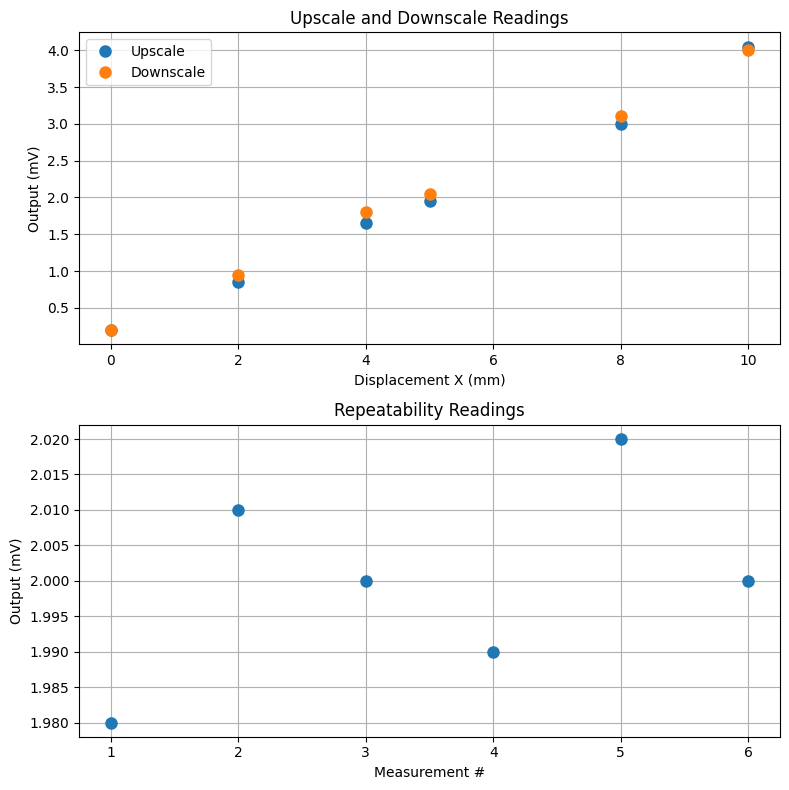

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# Upscale and downscale vs X (circles)
axes[0].plot(X, Y_upscale, 'o', label='Upscale', markersize=8)
axes[0].plot(X, Y_downscale, 'o', label='Downscale', markersize=8)
axes[0].set_xlabel('Displacement X (mm)')
axes[0].set_ylabel('Output (mV)')
axes[0].set_title('Upscale and Downscale Readings')
axes[0].legend()
axes[0].grid(True)

# Repeatability vs measurement number
measurements = np.arange(1, len(Y_repeat) + 1)
axes[1].plot(measurements, Y_repeat, 'o', markersize=8)
axes[1].set_xlabel('Measurement #')
axes[1].set_ylabel('Output (mV)')
axes[1].set_title('Repeatability Readings')
axes[1].set_xticks(measurements)
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:

# --- 2. Calculate Static Calibration Parameters ---

# --- A. Static Sensitivity (K) ---
# We calculate the slope (K) using linear regression (best fit line: yL(x) = a0 + a1*x),,
# We use the average of upscale and downscale data for the fit.
Y_avg = (Y_upscale + Y_downscale) / 2
slope, intercept, r_value, p_value, std_err = linregress(X, Y_avg)
K_static = slope # K is the static sensitivity (slope of the calibration curve),
Y_fit = intercept + slope * X
print(f"1. Static Sensitivity (K): {K_static:.4f} mV/mm")

# --- B. Zero Error (uz) ---
# The offset at zero input,. We use the average reading at X=0.0.
Y_zero = Y_avg
uz = Y_zero[0] # This can be corrected, but the remaining error/uncertainty must be noted
print(f"2. Zero Error (uz): {uz:.4f} mV")


# --- C. Linearity Error (uL) ---
# Maximum deviation of the actual average data (Y_avg) from the best-fit line (Y_fit),.
uL_max = np.max(np.abs(Y_avg - Y_fit))
# Expressed as a percentage of the Full-Scale Output (FSO) range (Y_max - Y_min),
FSO = np.max(Y_avg) - np.min(Y_avg)
percent_uLmax = (uL_max / FSO) * 100
print(f"3. Linearity Error (uL_max): {uL_max:.4f} mV (or {percent_uLmax:.2f}% FSO)")

# --- D. Hysteresis Error (uh) ---
# Maximum difference between upscale and downscale readings at the same input X,.
Y_diff = np.abs(Y_upscale - Y_downscale)
uh_max = np.max(Y_diff)
# Often specified as a percentage of FSO,.
percent_uhmax = (uh_max / FSO) * 100
print(f"4. Hysteresis Error (uh_max): {uh_max:.4f} mV (or {percent_uhmax:.2f}% FSO)")

# --- E. Repeatability Error (Type A Uncertainty) ---
# The variation in repeated readings at a fixed point,.
# We calculate the standard deviation of the mean (Type A standard uncertainty),,.
std_dev = np.std(Y_repeat, ddof=1) # Sample standard deviation (Sx),
n = len(Y_repeat)
u_rep_A = std_dev / np.sqrt(n) # Standard uncertainty = Sx / sqrt(n),,
print(f"5. Repeatability (Type A Standard Uncertainty): {u_rep_A:.4f} mV")



### Static Calibration Error Types and Uncertainty Analysis

Static calibration procedures are crucial for quantifying **systematic errors** (biases) and characterizing the instrument's performance,. The quantified range of these systematic errors (or the statistical variability from random errors) must then be converted into **standard uncertainty ($u_i$)** for use in an overall uncertainty budget,.

The table below details these error types, citing how they are measured and their resulting contribution to the uncertainty budget:

| Error Type | How it's Measured/Determined | Systematic Error Analysis Implication | Uncertainty Classification |
| :--- | :--- | :--- | :--- |
| **Zero Error** | The output value $y$ when the input $x$ is zero,. | If the offset is measured and corrected by adjusting the output, the remaining uncertainty is the smallest reading possible (resolution),. | **Type B** (Often derived from resolution limits). |
| **Static Sensitivity ($K$)** | The slope of the calibration curve, $K = dy/dx$,. | Used to define the functional correlation $y=f(x)$ for converting output to input,. Errors in estimating $K$ (sensitivity error $u_K$) quantify the random scatter about the fit,. | **Type A** (If derived statistically from scatter in calibration data). |
| **Linearity Error ($u_L$)** | The maximum deviation between the actual calibration curve and the best-fit linear curve,. | This represents a systematic bias (non-linearity) if a linear relationship is required. This bound defines the maximum possible uncorrected systematic error. | **Type B** (The bounds of this error, often specified by manufacturers, define a semi-range limit, $a$, typically assumed rectangular,). |
| **Hysteresis Error ($u_h$)** | The maximum difference between the upscale (increasing input) and downscale (decreasing input) output values at any given input $X$,. | Hysteresis is a systematic effect (bias) caused by factors like friction or residual charge,. It is quantified but generally not corrected. | **Type B** (The quantified range ($u_{h,max}$) is treated as a limit/semi-range, often assumed rectangular,). |
| **Repeatability Error** | The variability (scatter) found in $N$ repeated measurements taken at a fixed input value $x$,. | This is the source of **random error** (precision error), and is quantified via statistics,. | **Type A** (Calculated statistically from the standard deviation of the mean, $s_x / \sqrt{n}$,,). |

***

### Standard Uncertainty Conversion

To combine these uncertainties, all inputs must be converted to **standard uncertainty ($u_i$)**,.

*   **Type A (Repeatability)**: The calculation $u_{rep} = s_x / \sqrt{n}$ already provides the standard uncertainty (at one standard deviation, or $\approx 68\%$ confidence),.
*   **Type B (Linearity, Hysteresis, Resolution)**: If the uncertainty is based on a specified limit (semi-range $a$) and assumed to follow a rectangular distribution, the semi-range limit is divided by $\sqrt{3}$ to obtain the standard uncertainty,,:
    $$u_{\text{Type B}} = \frac{a}{\sqrt{3}}$$

This ensures all contributions can be combined using the Root-Sum-Squared (RSS) method to find the combined standard uncertainty ($u_c$),.

Do you want to run through an example of calculating the final combined standard uncertainty for this simulated LVDT, or would you like to discuss one of the error types (e.g., hysteresis) in more detail?